In [1]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import cos, asin, sqrt, pi
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

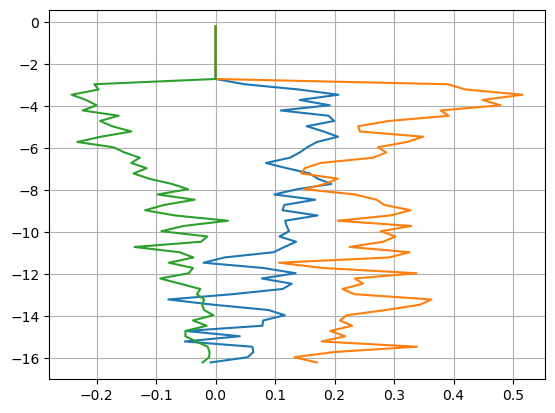

In [2]:
hf = h5py.File('ADCP_19_01_22_04.mat', 'r')
east_vel = hf['East_vel']
north_vel = hf['North_vel']
vertical_vel = hf['Vertical_vel']
z = hf['z_vec']

fig, ax = plt.subplots()
ax.plot(east_vel[1,:], z, label='East velocity [m/sec]')
ax.plot(north_vel[1,:], z, label='North velocity [m/sec]')
ax.plot(vertical_vel[1,:], z, label='Vertical velocity [m/sec]')
#plt.legend()

plt.grid(True)
plt.show()

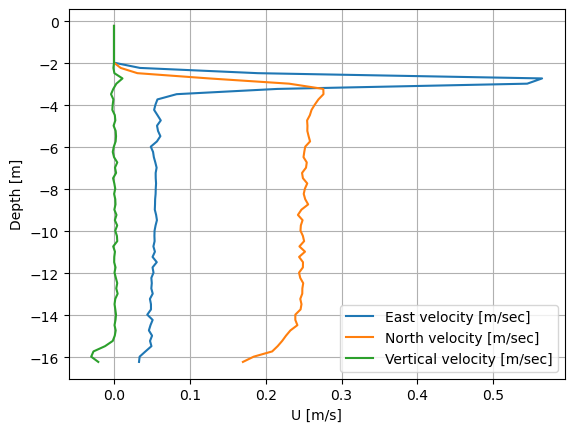

In [3]:
hf = h5py.File('ADCP_19_01_22_04.mat', 'r')
east_vel = np.array(hf['East_vel'])
north_vel = np.array(hf['North_vel'])
vertical_vel = np.array(hf['Vertical_vel'])
z = np.array(hf['z_vec'])
t = hf['time_vec']
hf.close()

time_start = 0*60 # sec
time_stop = 15*60 # sec
time_step = 1 #sec
start_i = int(time_start/time_step)
stop_i = int(time_stop/time_step)

east_vel_mean = np.mean(east_vel[start_i:stop_i], axis=0)
north_vel_mean = np.mean(north_vel[start_i:stop_i], axis=0)
vertical_vel_mean = np.mean(vertical_vel[start_i:stop_i], axis=0)

fig, ax = plt.subplots()
ax.plot(east_vel_mean, z, label='East velocity [m/sec]')
ax.plot(north_vel_mean, z, label='North velocity [m/sec]')
ax.plot(vertical_vel_mean, z, label='Vertical velocity [m/sec]')

plt.xlabel("U [m/s]")
plt.ylabel("Depth [m]")
plt.legend()
plt.grid(True)
plt.show()

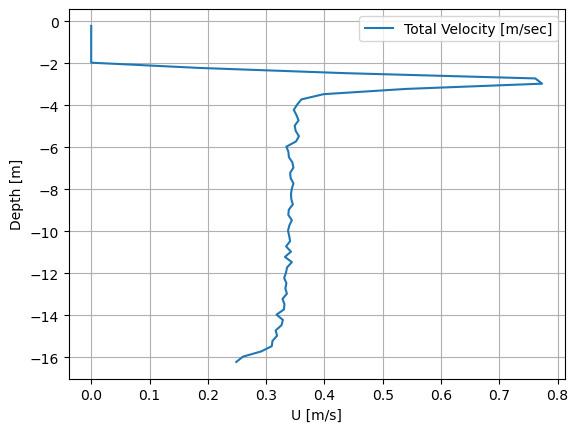

In [4]:
U = np.sqrt(north_vel_mean**2+east_vel_mean)
fig, ax = plt.subplots()
ax.plot(U, z, label='Total Velocity [m/sec]')
plt.legend()
plt.grid(True)
plt.xlabel("U [m/s]")
plt.ylabel("Depth [m]")
plt.show()

# 1) Mapping ADCP vs Radar Data Points

In [5]:
def distance(lat1, lon1, lat2, lon2):
    r = 6371 # km
    p = pi / 180

    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 2 * r * asin(sqrt(a))

In [6]:
# old data used
#radar_lat = 32.07833
#radar_long = 34.47233
#adcp_lat = 32.08048
#adcp_long = 34.46277

In [7]:
radar_lat = 32.1303600
radar_long = 34.78972
adcp_lat = 32.134666
adcp_long = 34.7743611

In [8]:
distance(radar_lat, radar_long, adcp_lat, adcp_long)

1.5234256264746922

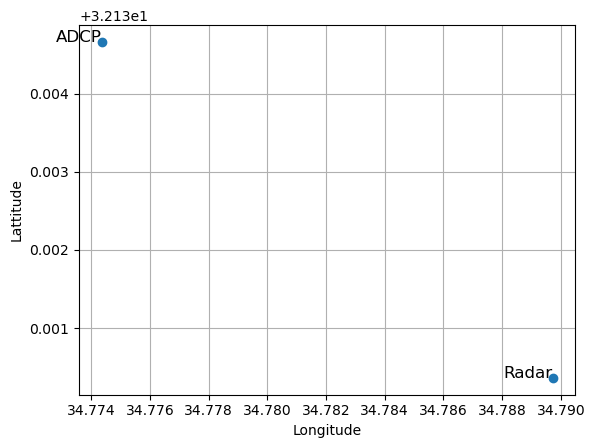

In [9]:
# Create scatter plot
plt.scatter(x=np.array([radar_long, adcp_long]), y=np.array([radar_lat, adcp_lat]))

# Label each point with an offset
plt.text(radar_long , radar_lat , 'Radar', fontsize=12, ha='right')
plt.text(adcp_long, adcp_lat , 'ADCP', fontsize=12, ha='right')

plt.xlabel("Longitude")
plt.ylabel("Lattitude")

# Set grid
plt.grid(True)

#plt.xlim(34.46, 34.473)

# Show the plot
plt.show()

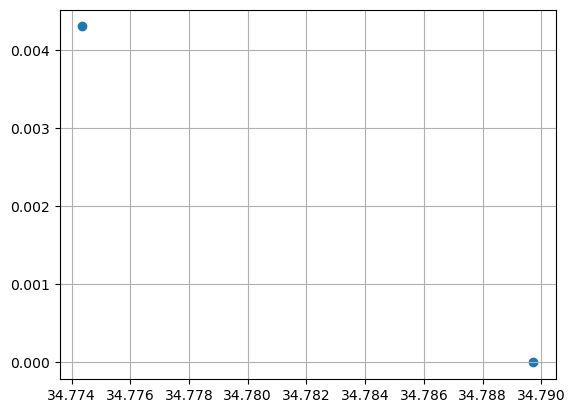

In [10]:
# Create scatter plot
plt.scatter(x=np.array([radar_long, adcp_long]), y=np.array([radar_lat - radar_lat, adcp_lat-radar_lat]))

plt.grid(True)
plt.show()

In [11]:
# Put the radar point on (0,0)

In [12]:
radar_0_lat = radar_lat - radar_lat
adcp_0_lat = adcp_lat - radar_lat

In [13]:
radar_0_long = radar_long - radar_long 
adcp_0_long = adcp_long - radar_long

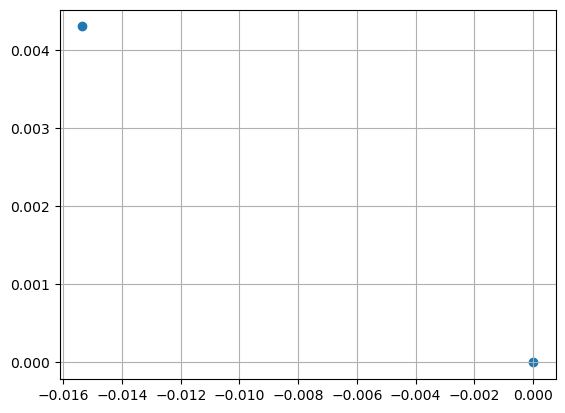

In [14]:
# Create scatter plot
plt.scatter(x=np.array([radar_0_long, adcp_0_long]), y=np.array([radar_0_lat, adcp_0_lat]))

# Set grid
plt.grid(True)

# Show the plot
plt.show()

In [15]:
# Convert to km 

In [16]:
x = np.array([radar_lat, adcp_lat])
y = np.array([radar_long, adcp_long])
x_dist = x[1]-x[0]
y_dist = y[0]-y[1]

In [17]:
theta = np.arctan2(y_dist,x_dist)

In [18]:
theta

1.2974551069890181

In [22]:
km_distance = distance(radar_lat, radar_long, adcp_lat, adcp_long)

In [24]:
km_distance 

1.5234256264746922

In [25]:
opp = km_distance*np.sin(theta)
opp

1.4668673989607568

In [26]:
adj = km_distance*np.cos(theta)
adj

0.4112489188629099

In [27]:
km_distance

1.5234256264746922

In [28]:
adcp_long_m = opp * 1000
adcp_lat_m = adj * 1000

In [29]:
sys.path.append("C:\\Users\josep\Desktop\PHYC40900_Project TP")
f = h5py.File('C:\\Users\josep\Desktop\PHYC40900_Project TP\Real Data Sets\First Tel-Aviv data', 'r')
x = f.get('x')
y = f.get('y')
t = f.get('t')
wamos = f.get('wamos')

x = np.array(x)
y = np.array(y)
t = np.array(t)
wamos = np.array(wamos)

In [30]:
def mean(x):
    return np.sum(x)/len(x)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.transforms import Affine2D

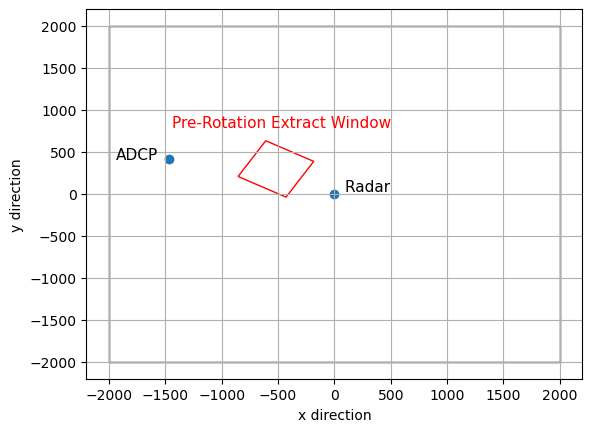

In [47]:
# Create scatter plot
plt.scatter(x=np.array([radar_0_long, -adcp_long_m]), y=np.array([radar_0_lat, adcp_lat_m]))

# Label each point with an offset
plt.text(radar_long  +500 ,radar_lat, 'Radar ', fontsize=11, ha='right')
plt.text(-adcp_long_m - 100, adcp_lat_m , 'ADCP', fontsize=11, ha='right')

plt.grid(True)

square_side = 4000
square_center = (0, 0)
square = patches.Rectangle((square_center[0] - square_side / 2, square_center[1] - square_side / 2), 
                           square_side, square_side, linewidth=1, edgecolor='black',  facecolor='none')
plt.gca().add_patch(square)

square_side = np.max(x) - x[0]
square_center = (mean(x), mean(y))
square = patches.Rectangle((square_center[0] - square_side / 2, square_center[1] - square_side / 2), 
                           square_side, square_side, linewidth=1, edgecolor='red',  facecolor='none')
plt.gca().add_patch(square)

plt.text(500 , 800 , 'Pre-Rotation Extract Window', fontsize=11, ha='right', color ='red')


plt.xlabel("x direction")
plt.ylabel("y direction")



# rotation angle in degrees
rotation_angle = 60

# rotation transformation
rotation_transform = Affine2D().rotate_deg(rotation_angle)

# Apply the rotation transformation to  square patch
square.set_transform(rotation_transform + plt.gca().transData)

# Show the plot
plt.show()

In [48]:
np.min(y)

352.5

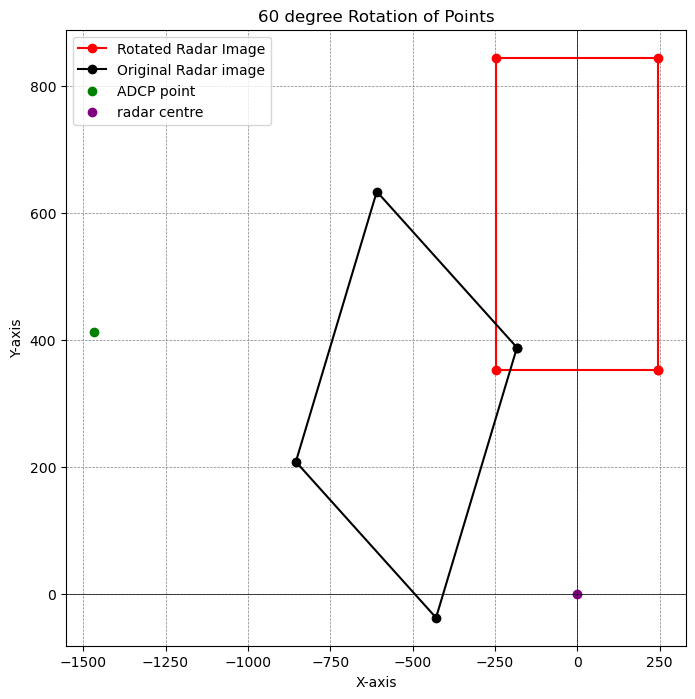

In [49]:
def rotate_point(x, y, theta):
    theta_rad = np.radians(theta)
    x_prime = x * np.cos(theta_rad) - y * np.sin(theta_rad)
    y_prime = x * np.sin(theta_rad) + y * np.cos(theta_rad)
    return x_prime, y_prime

# Radar image
p1 = (np.max(x), np.min(y))
p2 = (np.max(x), np.max(y))
p3 = (np.min(x), np.max(y))
p4 = (np.min(x), np.min(y))

# points rotated 60 degrees counterclockwise
theta = 60
p1_prime = rotate_point(*p1, theta)
p2_prime = rotate_point(*p2, theta)
p3_prime = rotate_point(*p3, theta)
p4_prime = rotate_point(*p4, theta)

plt.figure(figsize=(8, 8))
plt.plot([p1[0], p2[0], p3[0], p4[0], p1[0]], [p1[1], p2[1], p3[1], p4[1], p1[1]], label='Rotated Radar Image', marker='o', color='red')
plt.plot([p1_prime[0], p2_prime[0], p3_prime[0], p4_prime[0], p1_prime[0]],
         [p1_prime[1], p2_prime[1], p3_prime[1], p4_prime[1], p1_prime[1]],
         label='Original Radar image', marker='o', color = 'black')

plt.scatter(-np.array([adcp_long_m]), np.array([adcp_lat_m]), color = 'Green', label = "ADCP point")
plt.scatter(0,0, color='purple', label = "radar centre")

plt.title('60 degree Rotation of Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

# Try to rotate data

In [151]:
class PolData: # set POL records
    def __init__(self):
        self.str_lat = ''
        self.str_lon = ''
        self.str_date = ''
        self.str_time = ''

        self.fifo = 0
        self.bo2ra = 0
        self.size = 0
        self.nrow = 0
        self.fix_l = 0
        self.fix_h = 0

        self.data = []

def read_pol_data(path: str):#-> PolData:
    fi = open(path, "rb")

    ret = PolData()

    fi.readline()  # CC *** ...
    fi.readline()  # OWNER
    fi.readline()  # VINFO
    fi.readline()  # FINFO
    fi.readline()  # VERSN
    fi.readline()  # TOWER
    fi.readline()  # IDENT
    fi.readline()  # USER

    buff = fi.readline()  # LAT
    line = buff.decode("ascii", "replace")
    # LAT   032 07.833 N   CC [Degree] POSITION NORTH
    #line = line.replace(" ", ".")
    pack = line.split()
    assert pack[0] == "LAT"
    ret.str_lat = str(pack[1])

    buff = fi.readline()  # LONG
    line = buff.decode("ascii", "replace")
    # LONG  034 47.233 E   CC [Degree] POSITION EAST
    #line = line.replace(" ", ".")
    pack = line.split()
    assert pack[0] == "LONG"
    ret.str_lon = pack[1]

    fi.readline()  # POSTV

    buff = fi.readline()  # DATE
    line = buff.decode("ascii", "replace")
    # DATE  07-04-2021     CC [MM-DD-YYYY]
    pack = line.split()
    assert pack[0] == "DATE"
    ret.str_date = pack[1]

    buff = fi.readline()  # TIME
    line = buff.decode("ascii", "replace")
    # TIME  07:00:01       CC [HH:MM:SS]
    pack = line.split()
    assert pack[0] == "TIME"
    ret.str_time = pack[1]

    for i in range(14, 24):
        fi.readline()

    buff = fi.readline()  # FIFO
    line = buff.decode("ascii", "replace")
    # FIFO   1286   CC        Number of samples in range
    pack = line.split()
    assert pack[0] == "FIFO"
    ret.fifo = int(pack[1])

    buff = fi.readline()  # BO2RA
    line = buff.decode("ascii", "replace")
    # BO2RA    47   CC [deg]  ANGLE BETWEEN BOW AND RADAR HEADING
    pack = line.split()
    assert pack[0] == "BO2RA"
    ret.bo2ra = int(pack[1])
    if ret.bo2ra > 90:
        ret.bo2ra -= 180

    for i in range(26, 58):
        fi.readline()

    buff = fi.readline()
    line = buff.decode("ascii", "replace")
    # EOH   CC *** ...
    pack = line.split()
    assert pack[0] == "EOH"

    buff = fi.read(10)
    line = buff.decode("ascii", "replace")
    ret.size = int(line)

    assert ret.size % (2 * ret.fifo) == 0
    ret.nrow = ret.size // (2 * ret.fifo)

    for j in range(0, ret.nrow):
        row: List[int] = []
        for i in range(0, ret.fifo):
            buff = fi.read(2)
            pack = struct.unpack("<H", buff)
            val = pack[0]
            if val < 450:
                val = 0
                ret.fix_l += 1
            if val > 4095:
                val = val % 4096
                ret.fix_h += 1
            row.append(val)
        ret.data.append(row)

    fi.close()

    return ret

In [152]:
class PolData: # set POL records
    def __init__(self):
        self.str_lat = ''
        self.str_lon = ''
        self.str_date = ''
        self.str_time = ''

        self.fifo = 0
        self.bo2ra = 0
        self.size = 0
        self.nrow = 0
        self.fix_l = 0
        self.fix_h = 0

        self.data = []

In [114]:
fi = open("C:\\Users\\josep\\Desktop\\PHYC40900_Project TP\\Real Data Sets\\20220119040000csi.pol", "rb")

In [115]:
ret = PolData()
ret

In [116]:
fi.readline()  # CC *** ...
fi.readline()  # OWNER
fi.readline()  # VINFO
fi.readline()  # FINFO
fi.readline()  # VERSN
fi.readline()  # TOWER
fi.readline()  # IDENT
fi.readline()  # USER

b'USER  Furuno 8 ft\r\n'

In [117]:
buff = fi.readline()  # LAT
buff

b'LAT   032\xb007.833 N   CC [Degree] POSITION NORTH\r\n'

In [118]:
line = buff.decode("ascii", "replace")
line

'LAT   032�07.833 N   CC [Degree] POSITION NORTH\r\n'

In [141]:
line = line.replace(" ", ".")
line

'LAT...032�07.833.N...CC.[Degree].POSITION.NORTH\r\n'

In [142]:
pack = line.split()
pack

['LAT...032�07.833.N...CC.[Degree].POSITION.NORTH']

In [143]:
pack[0]

'LAT...032�07.833.N...CC.[Degree].POSITION.NORTH'

In [130]:
assert pack[0] == "LAT"

In [126]:
ret.str_lat = str(pack[1])
ret.str_lat

'032�07.833'

In [144]:
def read_pol_data(path: str):#-> PolData:
    fi = open(path, "rb")

    ret = PolData()

    fi.readline()  # CC *** ...
    fi.readline()  # OWNER
    fi.readline()  # VINFO
    fi.readline()  # FINFO
    fi.readline()  # VERSN
    fi.readline()  # TOWER
    fi.readline()  # IDENT
    fi.readline()  # USER

    buff = fi.readline()  # LAT
    line = buff.decode("ascii", "replace")
    # LAT   032 07.833 N   CC [Degree] POSITION NORTH
    #line = line.replace(" ", ".")
    pack = line.split()
    #assert pack[0] == "LAT"
    #ret.str_lat = str(pack[1])
    return pack

In [145]:
read_pol_data("C:\\Users\\josep\\Desktop\\PHYC40900_Project TP\\Real Data Sets\\20220119040000csi.pol")

['LAT', '032�07.833', 'N', 'CC', '[Degree]', 'POSITION', 'NORTH']

lat  032�07.833
lon  034�47.233
dimensions:  2669 2669
dx =  3.75


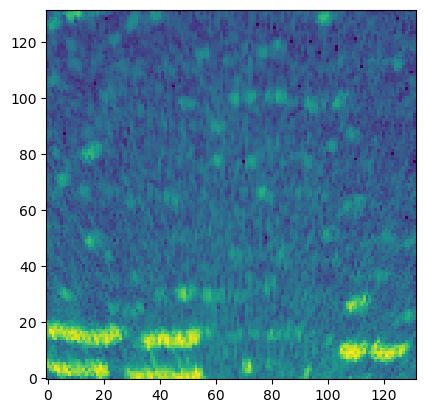

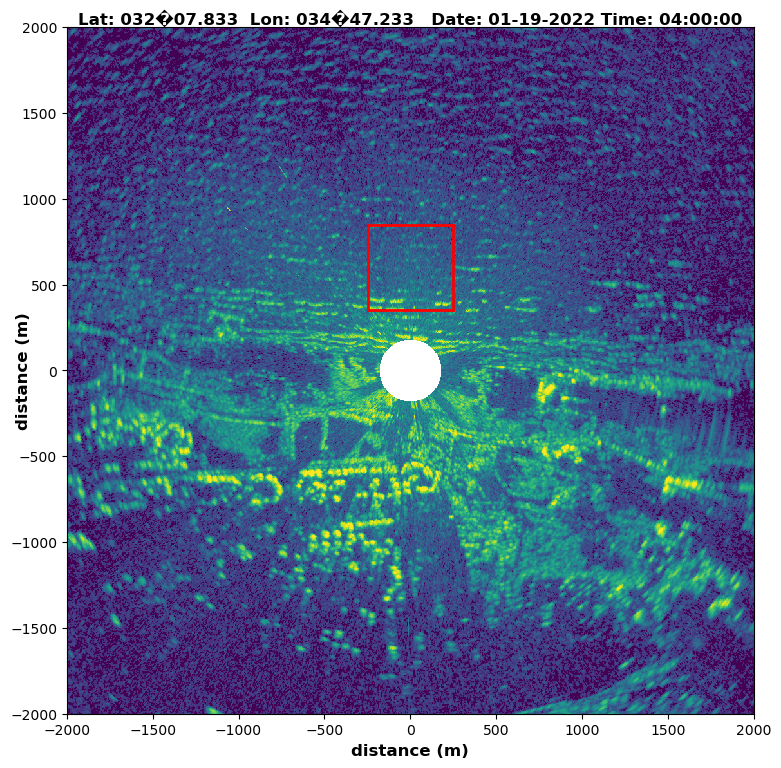

In [153]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
__author__ = 'grigorieva@tauex.tau.ac.il, soleilsusi@gmail.com'

import math

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

#from read_pol_data import PolData, read_pol_data
import h5py

import os
from datetime import datetime


'''
print('date ', data.str_date)
print('time ', data.str_time)
print('N_samples ', data.fifo) # number of samples in range
print('size ', data.size)
print('Nrow ', data.nrow)
print('fix_l ', data.fix_l)
print('fix_h ', data.fix_h)
print('angle ', data.bo2ra)
'''
class CartExtractor:
    def __init__(self, out_fn):
        self.dr = 3.75  # spatial step
        self.R1 = 180  # (m) to cover WAMOS position on the image
        self.R2 = 5002.50  # (m) (fifo +R1/dr)*dr - conversion into meters
        self.n0 = int(self.R1/self.dr)  # points to cover WAMOS position on the image (180 / 3.75)
        self.out_fn = out_fn
        self.hf = h5py.File(out_fn, 'a')
    
    def add_dataset(self, data_fn, Nt, Nx, Ny):
        ds = self.hf.create_dataset(data_fn, (Nt,Nx,Ny), dtype='i8')
        return ds
    
    def open_dataset(self, data_fn):
        self.hf['']
        
    def select_sub_grid(self, finame, main_wave_dir, y_offset, patch_size, plot_it=True):
        dr = self.dr
        R1 = self.R1
        R2 = self.R2
        n0 = self.n0

        data: PolData = read_pol_data(finame + '.pol')  
        print('lat ', data.str_lat)
        print('lon ', data.str_lon)
        time = t = datetime.strptime(data.str_time, '%H:%M:%S').time()
        Rsize = data.fifo + n0  # half size of cartesian array (0-R)

        D_old = np.empty((2*Rsize, 2*Rsize))  # power cartesian
        D_old.fill(np.NaN)


        rotate = 360-main_wave_dir

        x0 = np.arange(-Rsize, Rsize+1)
        X0, Y0 = np.meshgrid(x0, x0, indexing='ij')
        R_int = (np.sqrt(X0**2 + Y0**2)).astype(int)
        phi = np.arctan2(X0, Y0) + math.radians(data.bo2ra - rotate)
        phi = np.where(phi<0, phi+2*np.pi, phi)
        phi_int = (phi/2/np.pi*data.nrow).astype(int)
        r_filter = 1-np.logical_or(R_int<n0, R_int-n0>=data.fifo)
        phi_filter = 1-np.logical_or(phi_int<0, phi_int>data.nrow)
        D = np.where(r_filter * phi_filter, np.array(data.data)[phi_int,r_filter*R_int-n0], np.nan)
        D = D.T # transpose because imshow was used in the wrong way
        D = np.fliplr(D)
        str_lat, str_lon, str_date, str_time = data.str_lat, data.str_lon, data.str_date, data.str_time
        # close data object
        #del data


        Nx, Ny = D.shape
        print('dimensions: ', Nx, Ny)
        x_physical = np.linspace(-R2, R2, len(x0))
        dx = np.abs(x_physical[1]-x_physical[0])
        window_center_y = Nx//2 + np.argmin(np.abs(x_physical[Nx//2:]-y_offset))
        window_center_x = Nx//2
        N_points = int(patch_size/dx)#512
        print('dx = ', dx)
        ll_x = window_center_x - N_points//2
        ur_x = window_center_x + N_points//2
        ll_y = window_center_y - N_points//2
        ur_y = window_center_y + N_points//2
        D_sub_patch = D[ll_x:ur_x, ll_y:ur_y]
        x_out = x_physical[ll_x:ur_x]
        y_out = x_physical[ll_y:ur_y]


        if plot_it:
            plt.figure()
            plt.imshow((D_sub_patch).T, origin='lower', interpolation='none')
            
            fig, ax = plt.subplots(figsize=(20 / 2.54, 20 / 2.54))
            ax.imshow(D.T, origin='lower', interpolation='none', extent=[-R2,R2,-R2,R2])

            ax.set_xlim(-2000, 2000)  # to cut square of interest
            ax.set_ylim(-2000, 2000)

            ax.set_xlabel('distance (m)', fontsize=12, fontweight='bold')
            ax.set_ylabel('distance (m)', fontsize=12, fontweight='bold', labelpad=-15)

            #plt.figtext(0.519, 0.92, 'N', fontsize=20, fontweight='bold', color='cyan')
            #plt.figtext(0.1, 0.5, 'W', fontsize=20, fontweight='bold', color='cyan')
            #plt.figtext(0.51, 0.1, 'S', fontsize=20, fontweight='bold', color='cyan')
            #plt.figtext(0.92, 0.5, 'E', fontsize=20, fontweight='bold', color='cyan')
            ax.set_title("Lat: %s  Lon: %s   Date: %s Time: %s" %
                    (str_lat, str_lon, str_date, str_time),
                    fontsize=12, fontweight='bold', verticalalignment='top')
            ax.plot([x_physical[ll_x], x_physical[ur_x]],[x_physical[ll_y], x_physical[ll_y]], 'r-', linewidth=2)
            ax.plot([x_physical[ll_x], x_physical[ur_x]],[x_physical[ur_y], x_physical[ur_y]], 'r-', linewidth=2)
            ax.plot([x_physical[ll_x], x_physical[ll_x]],[x_physical[ll_y], x_physical[ur_y]], 'r-', linewidth=2)
            ax.plot([x_physical[ur_x], x_physical[ur_x]],[x_physical[ll_y], x_physical[ur_y]], 'r-', linewidth=2)
            plt.tight_layout()
            fig.savefig('Pol_%s_rot.png' % finame[-17:], format='png', dpi=600, bbox_inches='tight')
            #plt.show()
            #plt.close(fig)
        return time, x_out, y_out, D_sub_patch
    
    def collect_patches_to_file(self, loc, fn_start, T, main_wave_dir=280, patch_size=500, y_offset=600, toFile=True):
        lst_dir = sorted(os.listdir(loc))
        print(lst_dir[:3])
        fn_start_found = False
        i = 0
        while not fn_start_found:
            fn_start_found = fn_start[:10]==lst_dir[i][:10]
            i += 1
        i -= 1
        fn = os.path.join(loc, lst_dir[i][:-4])
        time0, x_out, y_out, data_0 = self.select_sub_grid(fn, main_wave_dir, y_offset, patch_size)
        # write out grid already to avoid running if file already exists
        if toFile:
            self.hf.create_dataset('x', data=x_out)
            self.hf.create_dataset('y', data=y_out)
        Nx, Ny = data_0.shape
        large_array = np.zeros((T//2+1, Nx, Ny)) # assume dt >=2 s
        large_array[0,:,:] = data_0
        s0 = 3600*time0.hour + 60 * time0.minute + time0.second
        delta_s = 0
        Nt = 1
        time_all = [0]
        while delta_s < T:
            i += 1
            Nt += 1
            fn = os.path.join(loc, lst_dir[i][:-4])
            time, x_out, y_out, large_array[Nt-1,:,:] = self.select_sub_grid(fn, main_wave_dir, y_offset, patch_size, plot_it=False)
            si = 3600*time.hour + 60 * time.minute + time.second
            delta_s = si - s0
            time_all.append(delta_s)
        t_out = np.linspace(0,time_all[-1], len(time_all))
        print('t = ', time_all)
        print('t = ', t_out)
        if toFile:
            self.hf.create_dataset('wamos', data=large_array[:Nt,:,:])
            self.hf.create_dataset('t', data=t_out)


if __name__=='__main__':

    #fn = '20220118210000csi'
    year_month = '202201'
    day = 19
    hour = 4
    loc = r"C:\Users\josep\Desktop\PHYC40900_Project TP\Real Data Sets"
    T = 15*60
    fn_start = '{0:s}{1:02d}{2:02d}'.format(year_month, day, hour) #+ '0000csi'
    main_wave_dir, y_offset, patch_size = 280, 600, 500
    fn = os.path.join(loc, fn_start)
    out_fn = 'Extract_{0:s}.hdmf'.format(fn_start[:10])
    CT = CartExtractor(out_fn)
    CT.select_sub_grid(fn+'0000csi', main_wave_dir, y_offset, patch_size)
    #CT.collect_patches_to_file(loc, fn_start, T, main_wave_dir, patch_size, y_offset, toFile=True)
    #fn_start = '20220119040337csi'
    #fn = os.path.join(loc, fn_start)
    #CT = CartExtractor('test.hdmf')
    #CT.select_sub_grid(fn, main_wave_dir, y_offset, patch_size)

    plt.show()


In [ ]:
C:\Users\josep\Desktop\PHYC40900_Project TP\Real Data Sets\20220119040000csi.pol

In [79]:
import os
out = os.path.isfile("C:\\Users\\josep\\Desktop\\PHYC40900_Project TP\\Real Data Sets\\20220119040000csi.pol")
print(out)

True


In [67]:
out = os.path.isfile(r"C:\Users\josep\Desktop\20220119040000csi.pol")
print(out)

True


In [66]:
out = os.path.isfile(r"C:\Users\josep\Desktop\20220119040000csi.pol")
out

True

In [1]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [2]:
points = 'C:\\Users\josep\Desktop\Long_Lats.csv'
data = pd.read_csv(points)

In [ ]:
radar_lat = 32.1303600
radar_long = 34.78972
adcp_lat = 32.134666
adcp_long = 34.7743611

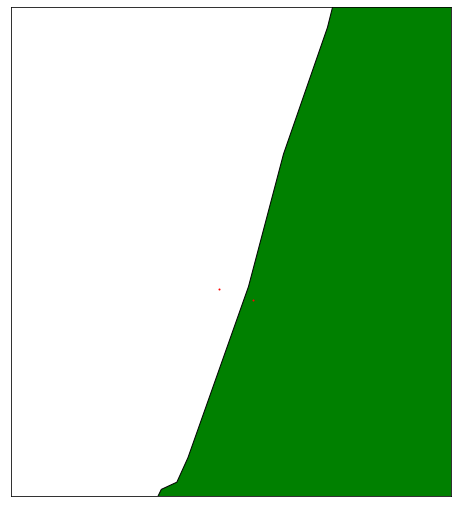

In [3]:
# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = 32.05, urcrnrlat = 32.25, llcrnrlon = 34.68, urcrnrlon = 34.88, resolution = 'h')

# drawing the coastline
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.fillcontinents(color='green', lake_color='blue')
#m.bluemarble()

# creating variable for latitude and longitude to list
lat = data['Latitude'].tolist()
lon = data['Longitude'].tolist()

# plotting the map
m.scatter(lon, lat, latlon = True, s = 1, c = 'red', marker = 'o', alpha = 1)

plt.show()

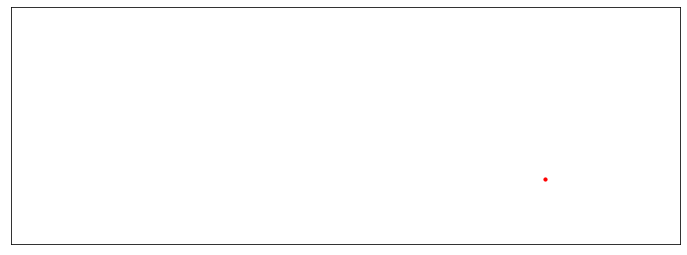

In [27]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setting the size of the map
fig = plt.figure(figsize=(12,9))

# create the map - setting latitude and longitude
m = Basemap( projection = 'mill', llcrnrlat = 47.85, urcrnrlat = 48.1, llcrnrlon = 106.2, urcrnrlon = 107.1, resolution ='h')

m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')

#m.fillcontinents(color='green', lake_color='blue')

# creating variable for latitude, longitude to list
lat = 47.9187393 
lon = 106.9175013

# plotting the map
m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = 'o', alpha = 1)

plt.show()

# 2) Comparison of Data

In [28]:
np.min(east_vel[start_i:stop_i], axis=0)

array([-0.7275645 , -0.6531519 , -0.52307343, -0.5399395 , -0.57830375,
       -0.50659895, -0.53312916, -0.5683676 , -0.60208106, -0.5734917 ,
       -0.57534236, -0.6116035 , -0.72134894, -0.6215041 , -0.6118934 ,
       -0.64464724, -0.622787  , -0.56316787, -0.6786153 , -0.6775521 ,
       -0.8108052 , -0.75052065, -0.8104326 , -0.8119468 , -0.9170202 ,
       -0.8909189 , -0.85812306, -0.8951973 , -0.9208828 , -0.96849495,
       -1.0894289 , -1.1164982 , -1.1768836 , -1.1298481 , -1.1616396 ,
       -1.2503443 , -1.3008751 , -1.3511829 , -1.3669752 , -1.3265848 ,
       -1.347569  , -1.4354113 , -1.408752  , -1.4687693 , -1.5710716 ,
       -1.6717857 , -1.7620285 , -1.869144  , -1.6900508 , -1.7731205 ,
       -1.7473847 , -1.4642019 , -1.2673812 , -0.97238773, -0.6236945 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
      dtype=float32)

In [29]:
np.max(east_vel[start_i:stop_i], axis=0)

array([0.659518  , 0.5381311 , 0.5299385 , 0.7412411 , 0.619594  ,
       0.5578446 , 0.64662653, 0.57297564, 0.6434871 , 0.68988174,
       0.7120161 , 0.7958058 , 0.74699706, 0.6892258 , 0.6586869 ,
       0.63403493, 0.67149895, 0.76710904, 0.7287491 , 0.6826985 ,
       0.7739818 , 0.73284364, 0.72580004, 0.7332256 , 0.7442327 ,
       0.7680681 , 0.7545365 , 0.8742584 , 0.86461675, 0.84589434,
       0.8734168 , 0.94569147, 0.97475916, 1.1016682 , 1.0173408 ,
       1.0425472 , 1.1687834 , 1.1777754 , 1.1934148 , 1.2157027 ,
       1.2873106 , 1.3329786 , 1.2789748 , 1.3829156 , 1.411933  ,
       1.4407734 , 1.5595173 , 1.6035916 , 1.6024034 , 1.7211622 ,
       1.7169883 , 1.7504215 , 1.7705914 , 1.8807609 , 2.1185517 ,
       2.7921867 , 3.0033448 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [30]:
np.std(east_vel[start_i:stop_i], axis=0)

array([0.19018304, 0.19270945, 0.1893016 , 0.19778454, 0.20005769,
       0.19464298, 0.20122251, 0.20135985, 0.20338538, 0.20460004,
       0.21163249, 0.2138583 , 0.2147727 , 0.21603523, 0.21922222,
       0.2230783 , 0.22415787, 0.22773957, 0.23175834, 0.23736595,
       0.24397036, 0.24678017, 0.25918686, 0.2642956 , 0.26741868,
       0.27744675, 0.28395453, 0.2862415 , 0.29450652, 0.30700493,
       0.31912747, 0.3308891 , 0.33728236, 0.341939  , 0.35347956,
       0.3728221 , 0.38344458, 0.39087728, 0.40234146, 0.41364703,
       0.42273405, 0.4360135 , 0.44921952, 0.47009426, 0.48640355,
       0.5008095 , 0.5194455 , 0.547754  , 0.5633946 , 0.57474166,
       0.5806141 , 0.58532315, 0.5745811 , 0.4839025 , 0.56593513,
       0.51629066, 0.29718366, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

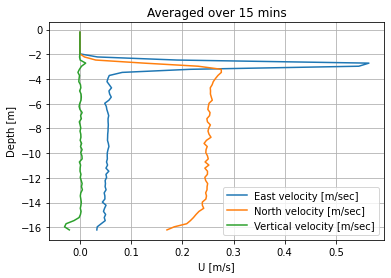

In [31]:
hf = h5py.File('ADCP_19_01_22_04.mat', 'r')
east_vel = np.array(hf['East_vel'])
north_vel = np.array(hf['North_vel'])
vertical_vel = np.array(hf['Vertical_vel'])
z = np.array(hf['z_vec'])
t = hf['time_vec']
hf.close()

time_start = 0*60 # sec
time_stop = 15*60 # sec
time_step = 1 #sec
start_i = int(time_start/time_step)
stop_i = int(time_stop/time_step)

east_vel_mean = np.mean(east_vel[start_i:stop_i], axis=0)
north_vel_mean = np.mean(north_vel[start_i:stop_i], axis=0)
vertical_vel_mean = np.mean(vertical_vel[start_i:stop_i], axis=0)

#std_deviation = np.std(east_vel[start_i:stop_i], axis=0)
#plt.errorbar(east_vel_mean, z[:,0], xerr=std_deviation, fmt='o', label='East velocity [m/sec]')


fig, ax = plt.subplots()
ax.plot(east_vel_mean, z, label='East velocity [m/sec]')
ax.plot(north_vel_mean, z, label='North velocity [m/sec]')
ax.plot(vertical_vel_mean, z, label='Vertical velocity [m/sec]')
plt.title("Averaged over 15 mins")

#ax.plot(np.max(east_vel[start_i:stop_i], axis=0), z, label='Maximum Ranges')
#ax.plot(np.min(east_vel[start_i:stop_i], axis=0), z, label='Minimum Ranges')

plt.xlabel("U [m/s]")
plt.ylabel("Depth [m]")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
data_edm = np.loadtxt('EDM_data.txt', skiprows=1)  # Skip the header row
data_pedm = np.loadtxt('PEDM_data.txt', skiprows=1)  # Skip the header row

In [33]:
U_EDM = data_edm[:,0]
z_EDM = data_edm[:,1]
U_PEDM = data_pedm[:,0]
z_PEDM = data_pedm[:,1]

(-20.0, 0.0)

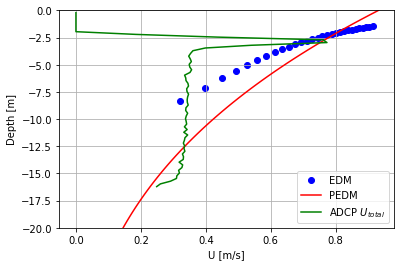

In [34]:
plt.scatter(U_EDM, z_EDM, label="EDM", color = 'blue')
plt.plot(U_PEDM, z_PEDM, label="PEDM", color = 'red')

U = np.sqrt(north_vel_mean**2+east_vel_mean)
plt.plot(U, z, label='ADCP $U_{total}$', color = 'green')

plt.grid(True)
plt.xlabel("U [m/s]")
plt.ylabel("Depth [m]")
plt.legend()

plt.ylim(-20,0)

## Closer Look at individual sd

In [35]:
np.mean( vertical_vel[start_i:stop_i][:,0] )

-0.020718405

In [36]:
vertical_vel[start_i:stop_i].shape

(360, 65)

In [37]:
vertical_vel[start_i:stop_i][:,0].shape

(360,)

In [38]:
east_vel_mean[0]

0.033002973

# 3) Angle of the current 

In [39]:
non_0 = (north_vel_mean != 0)

In [40]:
psi = np.arctan2(north_vel_mean[non_0], east_vel_mean[non_0])
psi

array([1.3790215 , 1.3893455 , 1.3743857 , 1.3458256 , 1.3597695 ,
       1.3529111 , 1.3756068 , 1.3743585 , 1.3608079 , 1.3892708 ,
       1.3750767 , 1.3761834 , 1.3803097 , 1.367948  , 1.3752245 ,
       1.3736255 , 1.3728989 , 1.3603787 , 1.3695487 , 1.3482262 ,
       1.365352  , 1.3597335 , 1.3614656 , 1.3603467 , 1.3599923 ,
       1.356581  , 1.351811  , 1.3469176 , 1.3457136 , 1.3564045 ,
       1.3625543 , 1.358866  , 1.35488   , 1.3554767 , 1.3564656 ,
       1.3534201 , 1.3527579 , 1.3523993 , 1.3596187 , 1.3635112 ,
       1.3683094 , 1.3807971 , 1.3552188 , 1.3368024 , 1.3469069 ,
       1.3520148 , 1.3331609 , 1.3523679 , 1.3704604 , 1.3671567 ,
       1.3614129 , 1.2802503 , 0.908222  , 0.40085006, 0.21833973,
       0.16111612, 0.25131348], dtype=float32)

Text(0, 0.5, 'Angle')

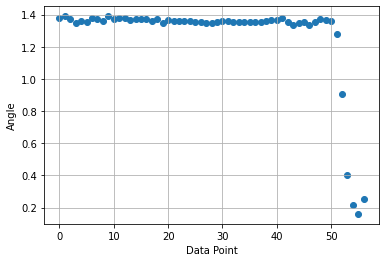

In [41]:
psi = np.arctan2(north_vel_mean[non_0], east_vel_mean[non_0])
no = np.arange(0, len(psi), 1)

plt.scatter(no , psi)
plt.grid(True)
plt.xlabel("Data Point")
plt.ylabel("Angle")

# 4) Vertical Velocity 

## 4.1) Vertical Velocity Gaussian

Text(0.5, 1.0, 'Vertical Velocity Histogram')

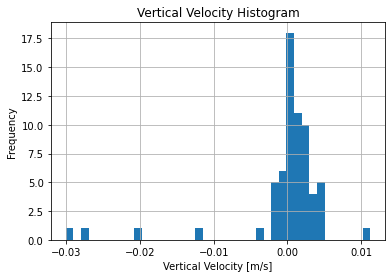

In [42]:
amplitudes_VU, amplitudesbins_VU, npatches_VU = plt.hist(vertical_vel_mean, bins=40, density=False)

plt.grid(True)
plt.xlabel("Vertical Velocity [m/s]")
plt.ylabel("Frequency")
plt.title("Vertical Velocity Histogram")

In [43]:
range_avg_VU = np.linspace(min(vertical_vel_mean), max(vertical_vel_mean), 40)
# Gives the average value of vertical velocity within each bin to help us fit a Gaussian Function to the data

In [44]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
# Defines the gaussian function with paramerters a, x0 and sigma

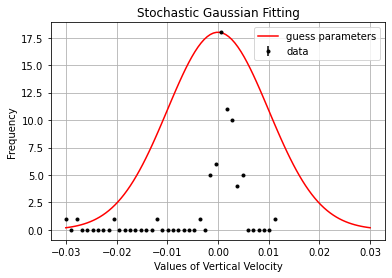

In [45]:
# plot the raw data
plt.errorbar(range_avg_VU, amplitudes_VU, yerr=0, fmt=".", color = 'black', label = 'data')
plt.grid(True)
plt.xlabel('Values of Vertical Velocity')
plt.ylabel('Frequency')


# initial guess
pars0 = (max(amplitudes_VU), 0,0.01)

# overlay gaussian
x = np.linspace(min(range_avg_VU), -min(range_avg_VU), 100)

plt.plot(x, gaus(x,*pars0), color = 'red', label = 'guess parameters')
plt.legend();
plt.title("Stochastic Gaussian Fitting");

## 4.2) Detection of Outliers

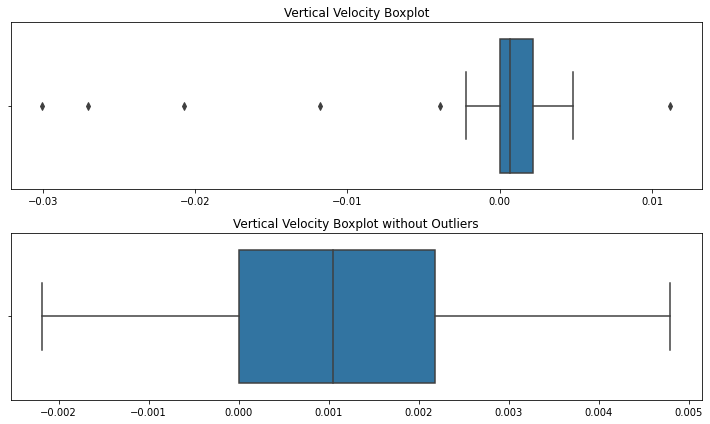

In [46]:
data = vertical_vel_mean

# first and third quartiles 
Q1 = np.percentile(data, 25 )
Q3 = np.percentile(data, 75)

# interquartile range
IQR = Q3 - Q1

# Lower and upper bounds identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify + remove outliers
filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

plt.figure(figsize=(10, 6))

# Original data
plt.subplot(2, 1, 1)
sns.boxplot(x=data)
plt.title('Vertical Velocity Boxplot')

# Filtered data without outliers
plt.subplot(2, 1, 2)
sns.boxplot(x=filtered_data)
plt.title('Vertical Velocity Boxplot without Outliers')

plt.tight_layout()
plt.show()
